# Lab15. Text dataset creation and design of Simple RNN for Sentiment Analysis

### Suriya S (225229140)

##### 1. Import libraries

In [1]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\online\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

##### 2. Creation of data

In [5]:
df = pd.read_csv("quotes.csv",encoding="ISO-8859-1")

In [6]:
df.head()

,Text,Label
0,Today I give thanks to everyone who has been p...,1
1,Nothing is particularly hard if you break it d...,1
2,Go confidently in the direction of your dreams...,1
3,"If you change your mindset, you have the abili...",1
4,All our dreams can come true if we have the co...,1


##### 3. Opening your CSV file

In [7]:
import csv

In [8]:
file = open('quotes.csv')

type(file)

_io.TextIOWrapper

In [9]:
csvreader = csv.reader(file)

In [10]:
header = []
header = next(csvreader)
header

['Text', 'Label']

In [11]:
rows = []
for row in csvreader:
        rows.append(row)
rows

[["Today I give thanks to everyone who has been part of my life's journey.",
  '1'],
 ['Nothing is particularly hard if you break it down into small jobs.', '1'],
 ['Go confidently in the direction of your dreams. Live the life you have imagined.',
  '1'],
 ['If you change your mindset, you have the ability to change your whole world.',
  '1'],
 ['All our dreams can come true if we have the courage to pursue them.', '1'],
 ['The key to success is to focus on goals, not obstacles.', '1'],
 ['All things are difficult before they are easy.', '1'],
 ['The best views comes after the hardest climb.', '1'],
 ['Life is not a problem to be solved, but a reality to be experienced.', '1'],
 ['Life is either daring Adventure or Nothing at all.', '1'],
 ['Negative People will always criticize.', '0'],
 ['People who have no life will always try to start drama in yours.', '0'],
 ['A Person who only thinks negatively will never move forward', '0'],
 ["While you can't control someone's negative behavio

In [12]:
file.close()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    20 non-null     object
 1   Label   20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


##### 4. Pre-processing the text

In [14]:
y = df['Label']
X = df['Text']

##### 5. Dataset Preparation

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [16]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(14,)
(6,)
(14,)
(6,)


In [17]:
# 4th step to be continue
train_token = Tokenizer(num_words=100,oov_token='<oov>')
train_token.fit_on_texts(X_train)
word_index = train_token.word_index
train_sequence = train_token.texts_to_sequences(X_train)
dict(list(word_index.items())[0:10])

{'<oov>': 1,
 'to': 2,
 'the': 3,
 'is': 4,
 'we': 5,
 'you': 6,
 'negative': 7,
 'all': 8,
 'in': 9,
 'people': 10}

In [18]:
vocab = len(train_token.word_index) + 1
vocab

101

In [19]:
train_sequence[3]

[21, 4, 46, 47, 15, 6, 48, 18, 49, 50, 51, 52]

In [20]:
train_padded = pad_sequences(train_sequence,maxlen=100,padding='post')

In [21]:
train_padded[5]

array([ 3, 59, 60, 61, 62,  3, 63, 64,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [22]:
train_padded.shape

(14, 100)

In [23]:
val_token = Tokenizer(num_words=500,oov_token='<oov>')
val_token.fit_on_texts(X_val)
val_index = val_token.word_index
val_sequence = val_token.texts_to_sequences(X_val)

In [24]:
val_sequence[4]

[48, 2, 49, 8, 50, 51, 52, 53, 54]

In [25]:
val_padded = pad_sequences(val_sequence,maxlen=100,padding='post')

In [26]:
val_padded[4]

array([48,  2, 49,  8, 50, 51, 52, 53, 54,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

###### 6. Model Creation

In [27]:
model = Sequential()
# Embedding layer
model.add(Embedding(300,70,input_length=100))
model.add(SimpleRNN(70,activation='relu'))
model.add(Dense('1',activation='sigmoid'))

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 70)           21000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 70)                9870      
                                                                 
 dense (Dense)               (None, 1)                 71        
                                                                 
Total params: 30,941
Trainable params: 30,941
Non-trainable params: 0
_________________________________________________________________


In [30]:
history=model.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 1s - loss: 0.6932 - accuracy: 0.5000 - 799ms/epoch - 799ms/step
Epoch 2/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 19ms/epoch - 19ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 13ms/epoch - 13ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 9ms/epoch - 9ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 7ms/epoch - 7ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 8ms/epoch - 8ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 7ms/epoch - 7ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 7ms/epoch - 7ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 8ms/epoch - 8ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 7ms/epoch - 7ms/step


In [31]:
model.evaluate(val_padded,y_val)

1/1 [==============================] - 0s 152ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931502223014832, 0.5]

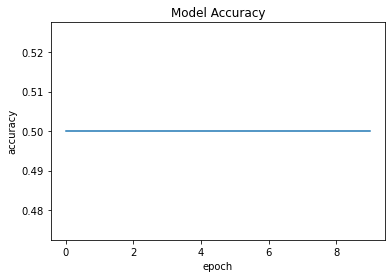

In [32]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

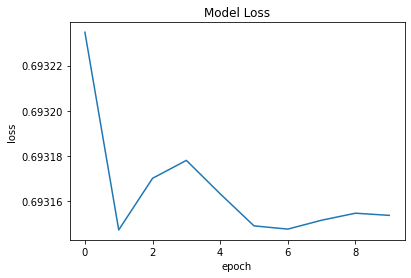

In [33]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [36]:
text = df["Text"]

In [37]:
#sent = [w.lower() for w in text.split() if not w in STOPWORDS]
trail_token = Tokenizer()
trail_token.fit_on_texts(text)
#word_index = trail_token.word_index
trail_seq = trail_token.texts_to_sequences(text)
#dict(list(word_index.items())[0:10])
trail_pad = pad_sequences(trail_seq,maxlen=100,padding='post')

In [38]:
trail_pad

array([[ 33,  34,  35, ...,   0,   0,   0],
       [ 21,   5,  44, ...,   0,   0,   0],
       [ 51,  52,   8, ...,   0,   0,   0],
       ...,
       [ 30, 128, 129, ...,   0,   0,   0],
       [133,   1, 134, ...,   0,   0,   0],
       [139,   8,   4, ...,   0,   0,   0]])

In [39]:
res = model.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 0s 108ms/step
[[0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]
 [0.5012159]] negative


C:\Users\online\AppData\Local\Temp\ipykernel_14836\1535703611.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])


### Model 2

In [40]:
model1 = Sequential()
# Embedding layer
model1.add(Embedding(5000,64,input_length=100))
model1.add(SimpleRNN(32,activation='tanh'))
model1.add(Embedding(5000,32,input_length=100))
model1.add(SimpleRNN(32,activation='tanh' ))
model1.add(Dense('1',activation='sigmoid'))

In [41]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 embedding_2 (Embedding)     (None, 32, 32)            160000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 485,217
Trainable params: 485,217
Non-trainable params: 0
_________________________________________________________________


In [42]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
history1=model1.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 1s - loss: 0.6941 - accuracy: 0.5000 - 833ms/epoch - 833ms/step
Epoch 2/10
1/1 - 0s - loss: 0.6943 - accuracy: 0.5000 - 6ms/epoch - 6ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6937 - accuracy: 0.5000 - 6ms/epoch - 6ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6933 - accuracy: 0.5000 - 6ms/epoch - 6ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6935 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6934 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 4ms/epoch - 4ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 6ms/epoch - 6ms/step


In [44]:
model1.evaluate(val_padded,y_val)

1/1 [==============================] - 0s 188ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932987570762634, 0.5]

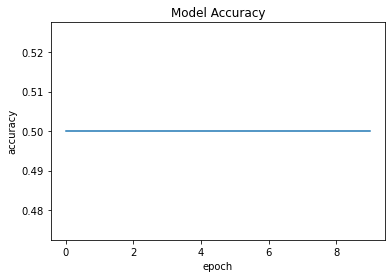

In [45]:
plt.plot(history1.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

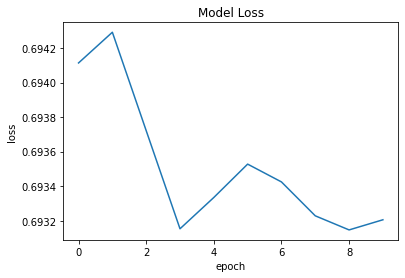

In [46]:
plt.plot(history1.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [47]:
res = model1.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 0s 147ms/step
[[0.49129575]
 [0.49129575]
 [0.49129575]
 [0.49129575]
 [0.49129575]
 [0.49129575]
 [0.49129575]
 [0.49129575]
 [0.49129575]
 [0.49129575]
 [0.49129575]
 [0.49129575]
 [0.49129575]
 [0.49129575]
 [0.49129575]
 [0.49129575]
 [0.49129575]
 [0.49129575]
 [0.49129578]
 [0.49129578]] negative


C:\Users\online\AppData\Local\Temp\ipykernel_14836\2701450631.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])


### Model 3

In [48]:
model2 = Sequential()
# Embedding layer
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh'))
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='relu' ))
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh' ))
model2.add(Dense('1',activation='sigmoid'))

In [49]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 128)          512000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                12352     
                                                                 
 embedding_4 (Embedding)     (None, 64, 128)           512000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 64)                12352     
                                                                 
 embedding_5 (Embedding)     (None, 64, 128)           512000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_2 (Dense)             (None, 1)                

In [50]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
history2=model2.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 1s - loss: 0.6975 - accuracy: 0.5000 - 846ms/epoch - 846ms/step
Epoch 2/10
1/1 - 0s - loss: 0.7086 - accuracy: 0.5000 - 10ms/epoch - 10ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6991 - accuracy: 0.5000 - 11ms/epoch - 11ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6935 - accuracy: 0.5000 - 11ms/epoch - 11ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6940 - accuracy: 0.5000 - 10ms/epoch - 10ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6952 - accuracy: 0.5000 - 10ms/epoch - 10ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6948 - accuracy: 0.5000 - 10ms/epoch - 10ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6937 - accuracy: 0.5000 - 10ms/epoch - 10ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 10ms/epoch - 10ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6933 - accuracy: 0.5000 - 11ms/epoch - 11ms/step


In [52]:
model2.evaluate(val_padded,y_val)

1/1 [==============================] - 0s 252ms/step - loss: 0.6938 - accuracy: 0.5000


[0.6938323378562927, 0.5]

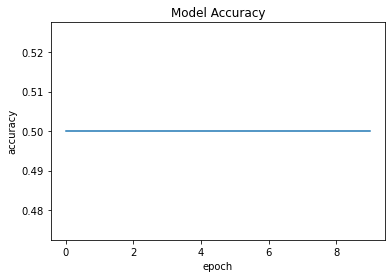

In [53]:
plt.plot(history2.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

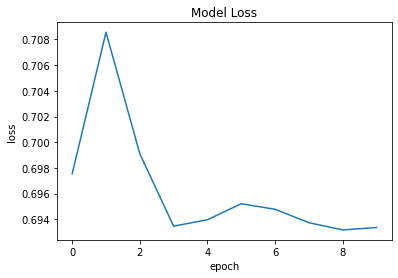

In [54]:
plt.plot(history2.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [55]:
res = model2.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 0s 206ms/step
[[0.48149738]
 [0.48149738]
 [0.48149738]
 [0.48149738]
 [0.48149738]
 [0.48149738]
 [0.48149738]
 [0.48149738]
 [0.48149738]
 [0.48149738]
 [0.48149738]
 [0.48149738]
 [0.48149738]
 [0.48149738]
 [0.48149738]
 [0.48149738]
 [0.48149738]
 [0.48149738]
 [0.48149735]
 [0.48149735]] negative


C:\Users\online\AppData\Local\Temp\ipykernel_14836\479605851.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])
